In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, pauli_error

from qiskit import ClassicalRegister, QuantumRegister

In [3]:
import qiskit.quantum_info as qi

id_op = qi.Operator([[1,0],[0,1]])

id_op

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [6]:
nq = 5

creg_data = ClassicalRegister(3)
creg_anc = ClassicalRegister(2)
# creg = ClassicalRegister(nq)
qreg = QuantumRegister(nq)

qc = QuantumCircuit(qreg,creg_data,creg_anc)

qc.cx(0,1)
qc.cx(0,2)

qc.barrier(range(nq))

qc.unitary(id_op, 0, label='bit-flip')
# qc.id(0, label='d')
# qc.x()

qc.barrier(range(nq))

qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)

qc.measure([3,4],[creg_anc[0],creg_anc[1]])

# |00> corresponds to classical binary 00
# |10> corresponds to q0 = |0> and q1 = |1> 
# : classical corresonds to 10 in binary, which is 2

# [NOTE] x(0) is required when q_ancilla_0 = 1, q_ancilla_1 = 1 
# => |11> in ancilla space => classical bits 11 in binary = 3
qc.x(0).c_if(creg_anc, 3) 
# [NOTE] x(1) is required when q_ancilla_0 = 1, q_ancilla_1 = 0
# => |01> in ancilla space => classical bits 01 in binary = 1
qc.x(1).c_if(creg_anc, 1)
qc.x(2).c_if(creg_anc, 2)

qc.barrier(range(nq))

qc.measure([0,1,2], [0,1,2])

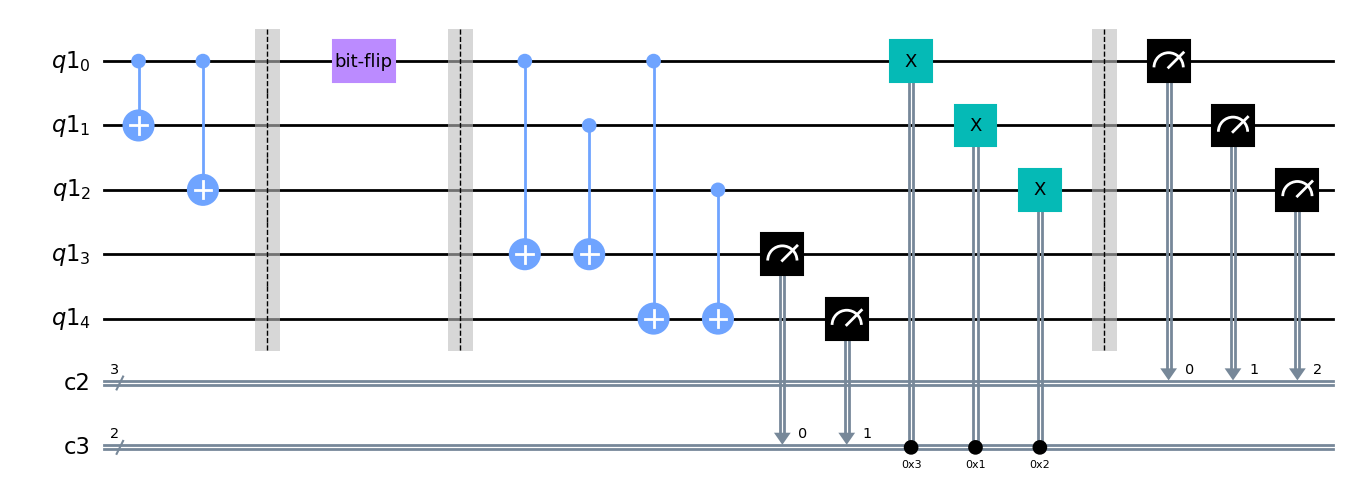

In [7]:
qc.draw('mpl')

In [8]:
p_err = 0.03 # 0.25 # 0.1
error_x = pauli_error([('X', p_err), ('I', 1 - p_err)])

In [9]:
model_bit_flip = NoiseModel()
# model_bit_flip.add_all_qubit_quantum_error(error_x, 'bit-flip')

# model_bit_flip.add_quantum_error(error_x, 'x', [1])

In [10]:
print(model_bit_flip)

NoiseModel: Ideal


In [11]:
sim_noise = AerSimulator(noise_model=model_bit_flip)
qc_tnoise = transpile(qc, sim_noise)

In [12]:
qc_tnoise.draw()

░  ░                           ┌───────┐ ┌────┐┌────────┐»
q1_0: ──■────■───░──░───■────■──────────────────┤ Rz(π) ├─┤ √X ├┤ Rz(2π) ├»
      ┌─┴─┐  │   ░  ░   │    │                  └───╥───┘ └─╥──┘└───╥────┘»
q1_1: ┤ X ├──┼───░──░───┼────┼────■─────────────────╫───────╫───────╫─────»
      └───┘┌─┴─┐ ░  ░   │    │    │                 ║       ║       ║     »
q1_2: ─────┤ X ├─░──░───┼────┼────┼────■────────────╫───────╫───────╫─────»
           └───┘ ░  ░ ┌─┴─┐  │  ┌─┴─┐  │  ┌─┐       ║       ║       ║     »
q1_3: ───────────░──░─┤ X ├──┼──┤ X ├──┼──┤M├───────╫───────╫───────╫─────»
                 ░  ░ └───┘┌─┴─┐└───┘┌─┴─┐└╥┘┌─┐    ║       ║       ║     »
q1_4: ───────────░──░──────┤ X ├─────┤ X ├─╫─┤M├────╫───────╫───────╫─────»
                 ░  ░      └───┘     └───┘ ║ └╥┘    ║       ║       ║     »
c2: 3/═════════════════════════════════════╬══╬═════╬═══════╬═══════╬═════»
                                           ║  ║  ┌──╨──┐ ┌──╨──┐ ┌──╨──┐  »
c3: 2/═════════════════════════════════════╩══╩══╡ 0x3 ╞═╡ 0x3 ╞═╡ 0x3 ╞══»
                                           0  1  └─────┘ └─────┘ └─────┘  »
«       ┌────┐┌────────┐                                                    »
«q1_0: ─┤ √X ├┤ Rz(3π) ├────────────────────────────────────────────────────»
«       └─╥──┘└───╥────┘┌───────┐ ┌────┐┌────────┐ ┌────┐┌────────┐         »
«q1_1: ───╫───────╫─────┤ Rz(π) ├─┤ √X ├┤ Rz(2π) ├─┤ √X ├┤ Rz(3π) ├─────────»
«         ║       ║     └───╥───┘ └─╥──┘└───╥────┘ └─╥──┘└───╥────┘┌───────┐»
«q1_2: ───╫───────╫─────────╫───────╫───────╫────────╫───────╫─────┤ Rz(π) ├»
«         ║       ║         ║       ║       ║        ║       ║     └───╥───┘»
«q1_3: ───╫───────╫─────────╫───────╫───────╫────────╫───────╫─────────╫────»
«         ║       ║         ║       ║       ║        ║       ║         ║    »
«q1_4: ───╫───────╫─────────╫───────╫───────╫────────╫───────╫─────────╫────»
«         ║       ║         ║       ║       ║        ║       ║         ║    »
«c2: 3/═══╬═══════╬═════════╬═══════╬═══════╬════════╬═══════╬═════════╬════»
«      ┌──╨──┐ ┌──╨──┐   ┌──╨──┐ ┌──╨──┐ ┌──╨──┐  ┌──╨──┐ ┌──╨──┐   ┌──╨──┐ »
«c3: 2/╡ 0x3 ╞═╡ 0x3 ╞═══╡ 0x1 ╞═╡ 0x1 ╞═╡ 0x1 ╞══╡ 0x1 ╞═╡ 0x1 ╞═══╡ 0x2 ╞═»
«      └─────┘ └─────┘   └─────┘ └─────┘ └─────┘  └─────┘ └─────┘   └─────┘ »
«                                         ░ ┌─┐      
«q1_0: ───────────────────────────────────░─┤M├──────
«                                         ░ └╥┘┌─┐   
«q1_1: ───────────────────────────────────░──╫─┤M├───
«       ┌────┐┌────────┐ ┌────┐┌────────┐ ░  ║ └╥┘┌─┐
«q1_2: ─┤ √X ├┤ Rz(2π) ├─┤ √X ├┤ Rz(3π) ├─░──╫──╫─┤M├
«       └─╥──┘└───╥────┘ └─╥──┘└───╥────┘ ░  ║  ║ └╥┘
«q1_3: ───╫───────╫────────╫───────╫──────░──╫──╫──╫─
«         ║       ║        ║       ║      ░  ║  ║  ║ 
«q1_4: ───╫───────╫────────╫───────╫──────░──╫──╫──╫─
«         ║       ║        ║       ║      ░  ║  ║  ║ 
«c2: 3/═══╬═══════╬════════╬═══════╬═════════╩══╩══╩═
«      ┌──╨──┐ ┌──╨──┐  ┌──╨──┐ ┌──╨──┐      0  1  2 
«c3: 2/╡ 0x2 ╞═╡ 0x2 ╞══╡ 0x2 ╞═╡ 0x2 ╞══════════════
«      └─────┘ └─────┘  └─────┘ └─────┘

In [13]:
n_shots = 1024

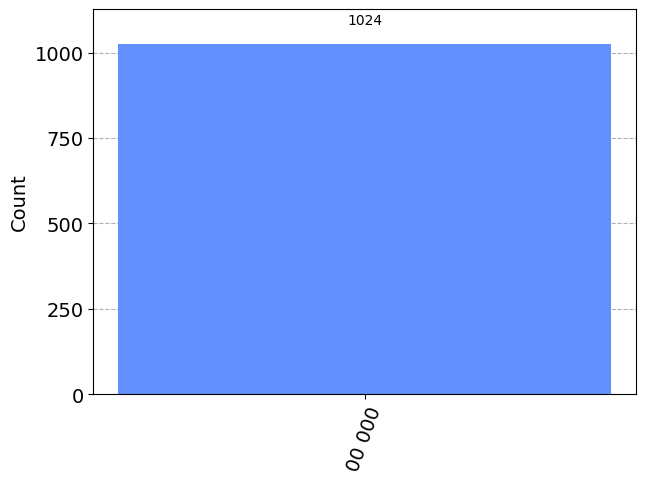

In [14]:
result_bit_flip = sim_noise.run(qc_tnoise, shots=n_shots).result()
counts_bit_flip = result_bit_flip.get_counts(0)

plot_histogram(counts_bit_flip)

In [15]:
# N_shots = result_bit_flip.results[0].shots

In [16]:
proportions = {
    k: counts_bit_flip[k] / n_shots 
    for k, v in counts_bit_flip.items()
}

In [17]:
proportions

{'00 000': 1.0}

---

In [2]:
nq = 1
qc = QuantumCircuit(nq)
qc.x(0)
qc.measure_all()
qc.draw()

┌───┐ ░ ┌─┐
     q: ┤ X ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [3]:
p_err = 0.03 # 0.25 # 0.1
error_x = pauli_error([('X', p_err), ('I', 1 - p_err)])

In [4]:
model_bit_flip = NoiseModel()
model_bit_flip.add_all_qubit_quantum_error(error_x, 'x')

In [7]:
sim_noise = AerSimulator(noise_model=model_bit_flip)
qc_tnoise = transpile(qc, sim_noise)

In [8]:
qc_tnoise.draw()

┌───┐ ░ ┌─┐
     q: ┤ X ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [18]:
n_shots = 1024

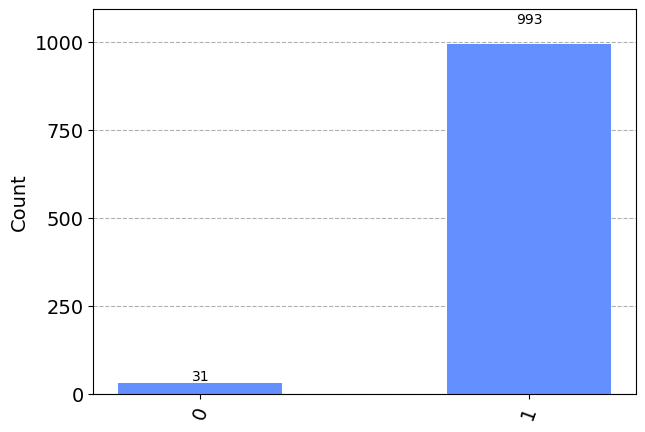

In [35]:
result_bit_flip = sim_noise.run(qc_tnoise, shots=n_shots).result()
counts_bit_flip = result_bit_flip.get_counts(0)

plot_histogram(counts_bit_flip)

In [36]:
# N_shots = result_bit_flip.results[0].shots

In [37]:
proportions = {
    k: counts_bit_flip[k] / n_shots 
    for k, v in counts_bit_flip.items()
}

In [28]:
proportions

{'1': 0.962890625, '0': 0.037109375}

In [38]:
proportions

{'1': 0.9697265625, '0': 0.0302734375}

In [33]:
proportions

{'1': 0.9638671875, '0': 0.0361328125}

In [39]:
proportions['0']

0.0302734375

In [34]:
p_err

0.03

In [27]:
sum(proportions.values())

1.0

---

In [2]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)

In [3]:
# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


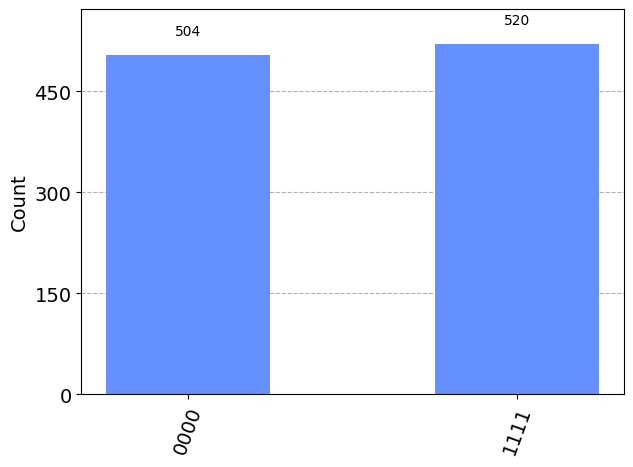

In [9]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

In [11]:
sim_ideal.configuration().basis_gates

['ccx',
 'cp',
 'cswap',
 'csx',
 'cu',
 'cu1',
 'cu2',
 'cu3',
 'cx',
 'cy',
 'cz',
 'delay',
 'diagonal',
 'ecr',
 'h',
 'id',
 'initialize',
 'mcp',
 'mcphase',
 'mcr',
 'mcrx',
 'mcry',
 'mcrz',
 'mcswap',
 'mcsx',
 'mcu',
 'mcu1',
 'mcu2',
 'mcu3',
 'mcx',
 'mcx_gray',
 'mcy',
 'mcz',
 'multiplexer',
 'p',
 'pauli',
 'r',
 'roerror',
 'rx',
 'rxx',
 'ry',
 'ryy',
 'rz',
 'rzx',
 'rzz',
 's',
 'sdg',
 'swap',
 'sx',
 'sxdg',
 't',
 'tdg',
 'u',
 'u1',
 'u2',
 'u3',
 'unitary',
 'x',
 'y',
 'z',
 'break_loop',
 'continue_loop',
 'for_loop',
 'if_else',
 'kraus',
 'qerror_loc',
 'quantum_channel',
 'roerror',
 'save_amplitudes',
 'save_amplitudes_sq',
 'save_clifford',
 'save_density_matrix',
 'save_expval',
 'save_expval_var',
 'save_matrix_product_state',
 'save_probabilities',
 'save_probabilities_dict',
 'save_stabilizer',
 'save_state',
 'save_statevector',
 'save_statevector_dict',
 'save_superop',
 'save_unitary',
 'set_density_matrix',
 'set_matrix_product_state',
 'set_stabi

In [56]:
p_err = 0.25 # 0.1 # 0.03
error_x = pauli_error([('X', p_err), ('I', 1 - p_err)])

In [57]:
model_bit_flip = NoiseModel()
model_bit_flip.add_all_qubit_quantum_error(error_x, 'h')

In [58]:
print(model_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['h']
  All-qubits errors: ['h']


In [59]:
from qiskit import transpile

In [60]:
sim_noise = AerSimulator(noise_model=model_bit_flip)

circ_tnoise = transpile(circ, sim_noise)

In [65]:
result_bit_flip = sim_noise.run(circ_tnoise).result()

counts_bit_flip = result_bit_flip.get_counts(0)

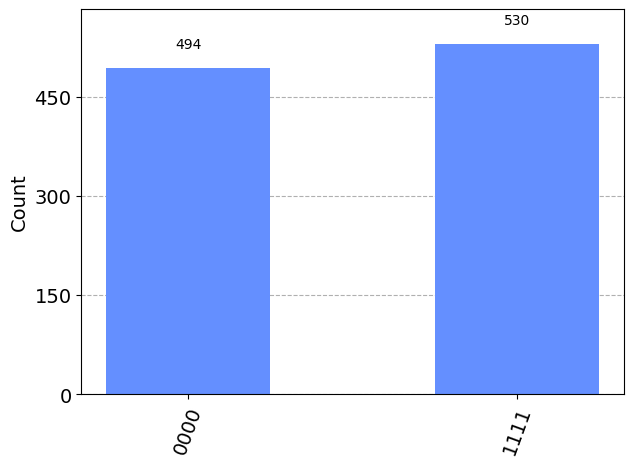

In [66]:
plot_histogram(counts_bit_flip)